# Application Development Summative

## Wind Farm Data

The first step in the process is to train a machine learning model using data collected from the wind farm. 

In [1]:
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline

In [4]:
wind_data = pd.read_csv(r"C:\Users\Admin\Documents\AIIP\AppDev\Summative\wind_generation_data.csv", encoding='utf8')

In [5]:
wind_data.tail(30)

,wind speed,direction,Power Output
336,15.31,227,37.96
337,15.16,227,46.65
338,15.01,227,41.62
339,14.85,227,39.73
340,14.69,227,40.85
341,14.53,228,46.42
342,14.36,228,37.56
343,14.19,228,40.29
344,14.02,228,41.45
345,13.85,229,45.37


In [6]:
wind_data.iloc[0]

wind speed       16.00
direction       218.00
Power Output     34.76
Name: 0, dtype: float64

In [7]:
wind_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wind speed    366 non-null    float64
 1   direction     366 non-null    int64  
 2   Power Output  366 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.7 KB


In [8]:
wind_data.columns.to_list() #we run this code to check for any additional white spaces or characters that result in errors when calling columns

['wind speed', 'direction', 'Power Output']

In [9]:
wind_data.isnull().sum() #check for missing values

wind speed      0
direction       0
Power Output    0
dtype: int64

### Visualization

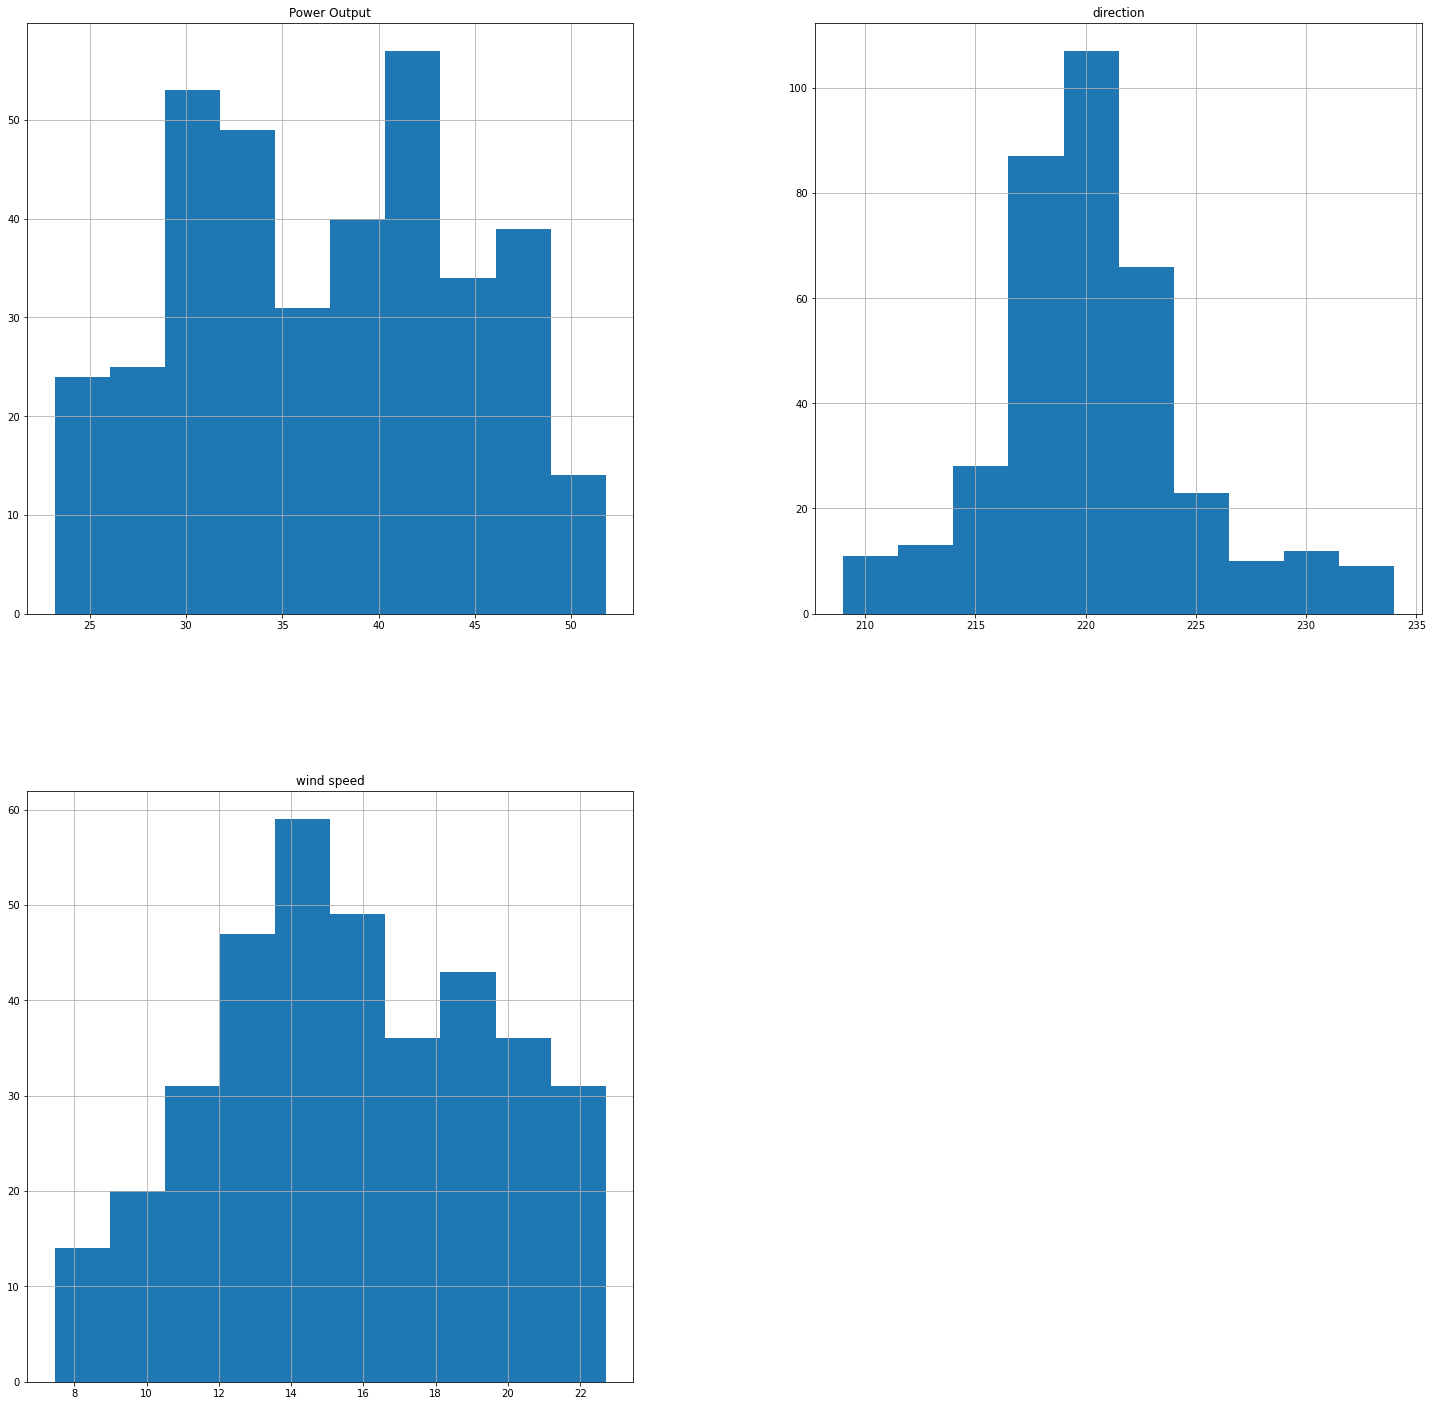

In [10]:
pd.DataFrame.hist(wind_data, figsize=(25,25));

Text(0.5, 1.0, 'Box plot of Power Generated')

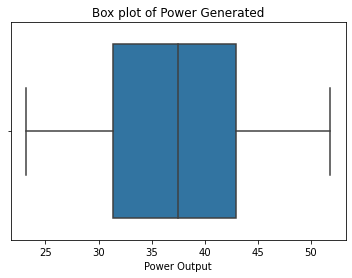

In [11]:
sns.boxplot(x='Power Output', data=wind_data)
plt.title('Box plot of Power Generated')

Training the Model

In [12]:
data_model=wind_data.drop(['Power Output'], axis=1) #drop the target variable and columns with string
X = data_model.values

In [13]:
y = wind_data['Power Output'].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
#X = StandardScaler().fit_transform(X)

In [16]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Fit the model

In [17]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [18]:
predictions = lm.predict(X_test)

In [19]:
print(predictions[0:5])

[42.9757614  41.28750239 42.41508319 37.26667784 23.34077492]


Score the model

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.581290108147686

In [21]:
with open(r"C:\Users\Admin\Documents\AIIP\AppDev\Practice\model_wind.pkl", 'wb') as file_out:
    pickle.dump(lm,file_out)
file_out.close()